Lucas Viñals de Luna

#INTRODUCCIÓN

En este trabajo se desarrollará un proyecto para la creación de una red neuronal con el objetivo de abordar un problema de regresión.

Para seleccionar el tema de este proyecto, se ha optado por elegir un área que tenga aplicaciones prácticas en la vida cotidiana. Por ello, hemos decidido que una opción relevante es realizar predicciones de temperatura en una ubicación específica.

A continuación, se procederá a la implementación y resolución de este proyecto:

Se importa keras:

In [3]:
import keras
keras.__version__

'2.15.0'

# Descarga y tratamiento de datos

Para iniciar el desarrollo del proyecto, es fundamental cargar la base de datos que se va a utilizar. La base de datos empleada en este proyecto ha sido obtenida de Kaggle y contiene los siguientes datos:

Se trata de un conjunto de datos con 96,453 registros, de los cuales se han seleccionado 12 características clave. Estas son:

- **Formatted date**: Fecha
- **Summary**: Resumen del clima en ese momento
- **Precip Type**: Tipo de precipitación
- **Temperature**: Temperatura en grados centígrados
- **Apparent Temperature**: Sensación térmica en grados centígrados
- **Humidity**: Humedad
- **Wind speed**: Velocidad del viento
- **Wind Bearing**: Dirección del viento
- **Visibility**: Rango de visibilidad
- **Cloud cover**: Nubosidad
- **Pressure**: Presión atmosférica
- **Daily summary**: Resumen diario

A continuación, se presentará una tabla como ejemplo de estos datos:



In [4]:
import pandas as pd
datos=pd.read_csv('weatherHistory.csv',encoding='latin-1')
datos.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Comprobamos que se han importado correctamente todos los datos:

In [5]:
datos.shape

(96453, 12)

Comprobamos el tipo de dato que se da en cada una de las características

In [6]:
datos.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

Se procede a verificar la existencia de valores nulos en los datos, con el objetivo de determinar si es necesario eliminar alguno de estos registros para asegurar el correcto funcionamiento de la red neuronal.

Asimismo, se examinan las columnas para identificar aquellas que contengan un único valor constante, ya que serían irrelevantes para el desarrollo de la red.

In [7]:
for c in datos.columns:
    print("Missing values [{0}]:".format(c), datos[c].isna().sum())
print()
for c in datos.columns:
    print("Unique values [{0}]:".format(c), datos[c].unique().size)

Missing values [Formatted Date]: 0
Missing values [Summary]: 0
Missing values [Precip Type]: 517
Missing values [Temperature (C)]: 0
Missing values [Apparent Temperature (C)]: 0
Missing values [Humidity]: 0
Missing values [Wind Speed (km/h)]: 0
Missing values [Wind Bearing (degrees)]: 0
Missing values [Visibility (km)]: 0
Missing values [Loud Cover]: 0
Missing values [Pressure (millibars)]: 0
Missing values [Daily Summary]: 0

Unique values [Formatted Date]: 96429
Unique values [Summary]: 27
Unique values [Precip Type]: 3
Unique values [Temperature (C)]: 7574
Unique values [Apparent Temperature (C)]: 8984
Unique values [Humidity]: 90
Unique values [Wind Speed (km/h)]: 2484
Unique values [Wind Bearing (degrees)]: 360
Unique values [Visibility (km)]: 949
Unique values [Loud Cover]: 1
Unique values [Pressure (millibars)]: 4979
Unique values [Daily Summary]: 214


Dado que se ha detectado la existencia de 517 registros con valores nulos, es necesario eliminarlos de la base de datos para garantizar la integridad y el correcto funcionamiento de la red neuronal.

In [8]:
datos=datos.dropna()

Se verifica nuevamente el número de registros para confirmar que las filas con valores nulos han sido eliminadas correctamente.

In [9]:
datos.shape

(95936, 12)

Una vez eliminados los registros nulos, es necesario categorizar las características que no son numéricas. Por lo tanto, se procede a categorizar las características 'Summary' y 'Precip Type'.

In [10]:
datos['Summary'] = datos['Summary'].astype('category').cat.codes
datos['Precip Type'] = datos['Precip Type'].astype('category').cat.codes

<ipython-input-10-32c981bdee10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Summary'] = datos['Summary'].astype('category').cat.codes
<ipython-input-10-32c981bdee10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Precip Type'] = datos['Precip Type'].astype('category').cat.codes


Se cambian los nombres de las columnas con el fin de facilitar el trabajo

In [11]:
datos.columns = ['Fecha','Summary','LLuvia','Temperatura','T ambiente','Humedad', 'Vel_viento','Viraje viento','Visibilidad','loud cover','Presión','Datos']
datos

,Fecha,Summary,LLuvia,Temperatura,T ambiente,Humedad,Vel_viento,Viraje viento,Visibilidad,loud cover,Presión,Datos
0,2006-04-01 00:00:00.000 +0200,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,19,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,19,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,19,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,19,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


Se muestra uno de los registros para ver que cumple las modificaciones que se han aplicado a la base de datos inicial

In [12]:
datos.loc[2]

Fecha                2006-04-01 02:00:00.000 +0200
Summary                                         17
LLuvia                                           0
Temperatura                               9.377778
T ambiente                                9.377778
Humedad                                       0.89
Vel_viento                                  3.9284
Viraje viento                                204.0
Visibilidad                                14.9569
loud cover                                     0.0
Presión                                    1015.94
Datos            Partly cloudy throughout the day.
Name: 2, dtype: object

Una vez completado este proceso, se deben generar las etiquetas para cada uno de los registros. Dado que este es un proyecto de aprendizaje supervisado, se selecciona la columna 'Temperature' de la base de datos como etiqueta para cada registro.

Se verifica el tamaño de estas etiquetas para asegurarse de que hay una correspondiente a cada registro de entrada.


In [13]:
labels=datos.Temperatura
labels.shape


(95936,)

Con las etiquetas y la base de datos ya preparadas, es necesario eliminar las columnas que no serán utilizadas como entrada para la red neuronal, así como la columna que contiene los valores de temperatura, ya que ahora se utilizan como etiquetas.

Las columnas eliminadas son:

- **Fecha**: No aporta información relevante en comparación con el resto de las características.
- **Datos**: Existe la columna 'Summary' que proporciona datos idénticos.
- **Cloud Cover**: Tiene un valor único y, por lo tanto, no ofrece información distintiva para los diferentes registros.
- **Temperatura**: Los valores de esta columna ahora se utilizan como etiquetas.

In [14]:
datos=datos.drop(['Fecha'],axis=1)
datos=datos.drop(['Datos'],axis=1)
datos=datos.drop(['loud cover'],axis=1)
datos=datos.drop(['Temperatura'],axis=1)

Se comprueba de nuevo el tamaño de los datos

In [15]:
datos.shape

(95936, 8)

Dado que se dispone de una sola base de datos, es necesario separar estos datos en conjuntos de entrenamiento y prueba. Se utilizarán 70,000 datos para el entrenamiento y aproximadamente 26,000 datos para la prueba.

De igual manera, las etiquetas deben ser separadas en conjuntos de entrenamiento y prueba correspondientes.

In [16]:
train_datos=datos[:70000]
test_datos=datos[70001:]

train_labels=labels[:70000]
test_labels=labels[70001:]

se comprueba el tamaño de los datos de test y entrenamiento para verificar que se ha realizado correctamente la división

In [17]:
train_datos.shape
test_datos.shape

(25935, 8)

Una vez que los datos están separados, es crucial normalizar las características debido a que cada una tiene rangos distintos. En el contexto de un problema de regresión, la normalización se realiza utilizando la media y la desviación estándar de cada característica.

Es fundamental tener en cuenta que los datos de prueba deben ser normalizados utilizando la media y la desviación estándar de los datos de entrenamiento. Esto asegura que los datos de prueba no se vean afectados ni contaminados por el proceso de normalización.

In [18]:
mean = train_datos.mean(axis=0)
print("##### Media de las 8 características de los datos de entrenamiento ##### ")
print(mean)
train_datos -= mean
std = train_datos.std(axis=0)
print("##### Desviación estandar de las 8 características de los datos de entrenamiento ##### ")
print(std)
train_datos /= std
test_datos -= mean
test_datos /= std

##### Media de las 8 características de los datos de entrenamiento ##### 
Summary            15.874143
LLuvia              0.127229
T ambiente         10.693272
Humedad             0.730353
Vel_viento         10.868822
Viraje viento     189.321371
Visibilidad        10.039112
Presión          1003.466910
dtype: float64
##### Desviación estandar de las 8 características de los datos de entrenamiento ##### 
Summary            4.509865
LLuvia             0.333231
T ambiente        10.956204
Humedad            0.197574
Vel_viento         7.013348
Viraje viento    107.766729
Visibilidad        3.918958
Presión          115.945929
dtype: float64


# CREACIÓN DE LA RED

Vamos a proceder con la creación de la red neuronal diseñada para realizar predicciones de temperatura, utilizando un modelo de regresión con las siguientes especificaciones técnicas:

1. **Arquitectura del modelo:**
   - El modelo consta de 3 capas.
   - Las dos primeras capas son capas densas con 128 neuronas cada una.
   - La función de activación utilizada en estas capas es ReLU, que es ideal para problemas de regresión ya que produce salidas no negativas (max(0, s)).

2. **Capa de salida:**
   - La última capa consta de una sola neurona.
   - No se aplica ninguna función de activación en la capa de salida, lo cual se conoce como salida abierta. Esto se elige así para obtener un único valor numérico como predicción de temperatura.

3. **Optimizador:**
   - Se utiliza el optimizador RMSprop, que es efectivo para ajustar los pesos del modelo en problemas de regresión.

4. **Función de pérdida y métricas:**
   - La función de pérdida utilizada es el error medio absoluto (MAE, Mean Absolute Error), que es robusto frente a valores atípicos y es comúnmente utilizado en problemas de regresión.
   - Como métrica adicional se emplea el error medio cuadrático (MSE, Mean Squared Error), que proporciona una medida de la dispersión de los errores al cuadrado.

Estas configuraciones aseguran que el modelo esté adecuadamente estructurado y optimizado para realizar predicciones precisas de temperatura basadas en los datos de entrenamiento proporcionados.

In [19]:
import tensorflow as tf
from keras import models
from keras import layers

def build_model():
    # Porque necesitaremos instanciar el mismo modelo
    # múltiples veces, usamos una función para construirlo
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu',
                           input_shape=(train_datos.shape[1],)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1))
    # MSE: Mean Squared Error
    # MAE: Mean Absolute Error
    model.compile(optimizer='rmsprop', loss='mse',
                  metrics=[tf.keras.metrics.MeanAbsoluteError()]) # metrics = ['mae']
    return model

Para poder entrenar la red neuronal, es necesario separar los datos de entrenamiento en dos conjuntos distintos: datos de entrenamiento y datos de validación. En este caso, se utilizarán 50,000 datos para entrenamiento y 20,000 datos para validación.

In [20]:
partial_train_datos = train_datos[:50000]
partial_eval_train_datos = train_datos[50001:]
partial_train_labels = train_labels[:50000]
partial_eval_train_labels= train_labels[50001:]

Se procede a crear el modelo

In [21]:
mymodel = build_model()

Una vez creado el modelo diseñado anteriormente, procederemos a entrenarlo. Con el fin de determinar el número adecuado de épocas para entrenar el modelo y observar cuándo ocurre el sobreajuste, se entrenará con 100 épocas.

El tamaño del lote (batch size) elegido es 128, dado que disponemos de 50,000 datos de entrenamiento. Esto significa que los pesos del modelo se actualizarán después de procesar 128 datos de entrenamiento en cada época.

In [22]:
history = mymodel.fit(partial_train_datos, partial_train_labels,
            validation_data=(partial_eval_train_datos, partial_eval_train_labels),
                        epochs=100, batch_size=128)

Epoch 1/100
391/391 [==============================] - 3s 6ms/step - loss: 13.2832 - mean_absolute_error: 1.6875 - val_loss: 0.7707 - val_mean_absolute_error: 0.6973
Epoch 2/100
391/391 [==============================] - 3s 7ms/step - loss: 0.3615 - mean_absolute_error: 0.4656 - val_loss: 0.7841 - val_mean_absolute_error: 0.7473
Epoch 3/100
391/391 [==============================] - 2s 4ms/step - loss: 0.2862 - mean_absolute_error: 0.4096 - val_loss: 0.2263 - val_mean_absolute_error: 0.3434
Epoch 4/100
391/391 [==============================] - 2s 4ms/step - loss: 0.2509 - mean_absolute_error: 0.3822 - val_loss: 0.1769 - val_mean_absolute_error: 0.2899
Epoch 5/100
391/391 [==============================] - 1s 4ms/step - loss: 0.2246 - mean_absolute_error: 0.3577 - val_loss: 0.1365 - val_mean_absolute_error: 0.2351
Epoch 6/100
391/391 [==============================] - 1s 4ms/step - loss: 0.2083 - mean_absolute_error: 0.3440 - val_loss: 0.4006 - val_mean_absolute_error: 0.5243
Epoch 7/1

Se guardan los valores de error medio absoluto y pérdida en la validación para poder graficarlos.

In [23]:
mae_history = history.history['val_mean_absolute_error']

In [24]:
mse_history = history.history['val_loss']

Se confrontan en una gráfica las épocas frente a la pérdida pérdida (MSE)

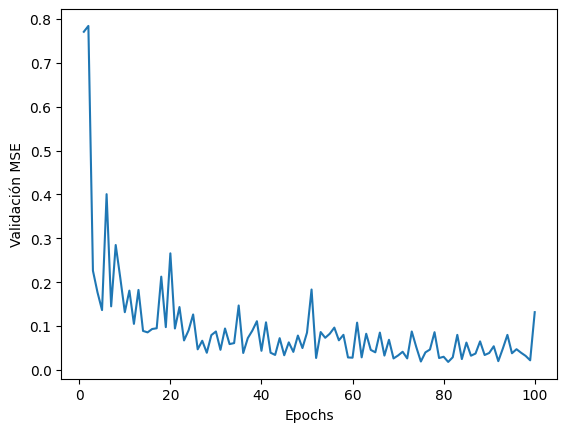

In [25]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(mse_history) + 1), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MSE')
plt.show()

Se realiza una gráfica para comparar las pérdidas de entreno y validación

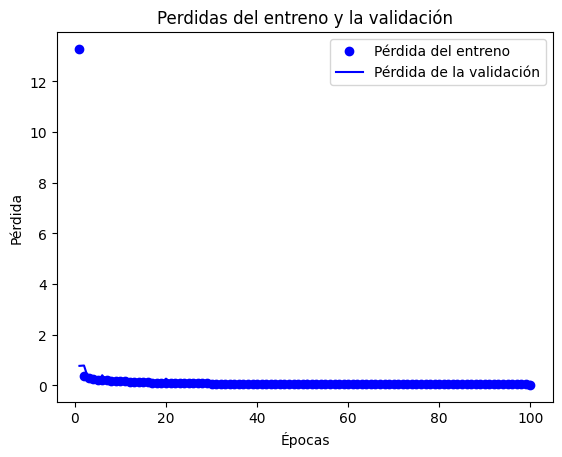

In [26]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

Se confrontan en una gráfica las épocas contra la métrica de error absoluto medio (MAE)

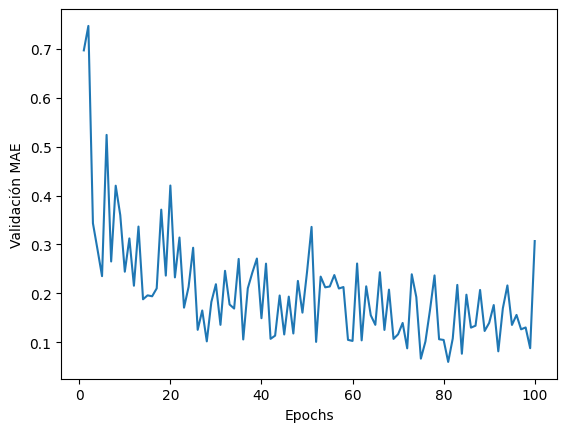

In [27]:
 import matplotlib.pyplot as plt

plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

Por último se realiza una gráfica para comparar el mae de entreno y validación

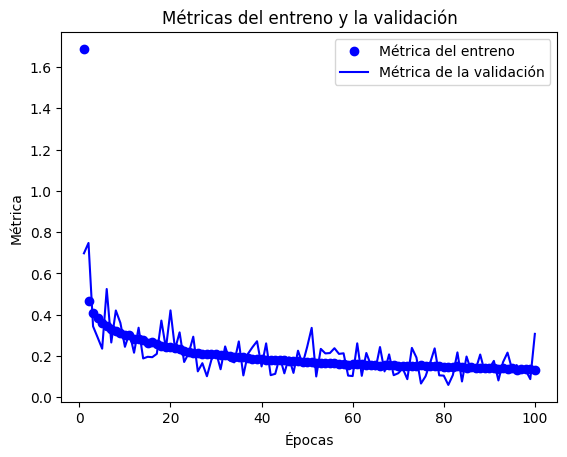

In [28]:
import matplotlib.pyplot as plt

loss = history.history['mean_absolute_error']
val_loss = history.history['val_mean_absolute_error']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Métrica del entreno')
plt.plot(epochs, val_loss, 'b', label='Métrica de la validación')
plt.title('Métricas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Métrica')
plt.legend()

plt.show()

Después de revisar las distintas gráficas de métricas y validación, se ha observado que a partir de la época 20 se empieza a evidenciar sobreajuste. Aunque las gráficas pueden presentar variaciones y picos, este punto parece ser óptimo para evitar que la red se sobreentrene y logre la mejor predicción posible sin incurrir en un alto costo computacional.

Para validar esta observación, procederemos a entrenar un nuevo modelo utilizando la misma arquitectura, pero limitando el entrenamiento a solo 20 épocas.

In [29]:
mymodel2 = build_model()

In [30]:
history = mymodel2.fit(partial_train_datos, partial_train_labels,
            validation_data=(partial_eval_train_datos, partial_eval_train_labels),
                        epochs=20, batch_size=128)

Epoch 1/20
391/391 [==============================] - 4s 8ms/step - loss: 13.4049 - mean_absolute_error: 1.7020 - val_loss: 0.5348 - val_mean_absolute_error: 0.4934
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 0.3517 - mean_absolute_error: 0.4564 - val_loss: 0.3786 - val_mean_absolute_error: 0.4739
Epoch 3/20
391/391 [==============================] - 2s 4ms/step - loss: 0.2667 - mean_absolute_error: 0.3964 - val_loss: 0.2112 - val_mean_absolute_error: 0.3368
Epoch 4/20
391/391 [==============================] - 2s 4ms/step - loss: 0.2303 - mean_absolute_error: 0.3630 - val_loss: 0.1915 - val_mean_absolute_error: 0.3220
Epoch 5/20
391/391 [==============================] - 2s 4ms/step - loss: 0.2162 - mean_absolute_error: 0.3527 - val_loss: 0.2427 - val_mean_absolute_error: 0.3858
Epoch 6/20
391/391 [==============================] - 2s 5ms/step - loss: 0.2023 - mean_absolute_error: 0.3417 - val_loss: 0.1855 - val_mean_absolute_error: 0.3118
Epoch 7/20
391/

Se guardan de nuevo tanto la pérdida como la métrica de validación y se realizan las mismas gráficas que se han realizado con el modelo anterior.

In [31]:
mae_history = history.history['val_mean_absolute_error']
mse_history = history.history['val_loss']

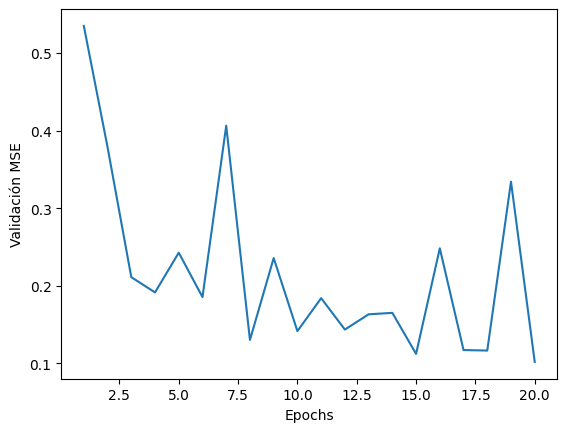

In [32]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(mse_history) + 1), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MSE')
plt.show()

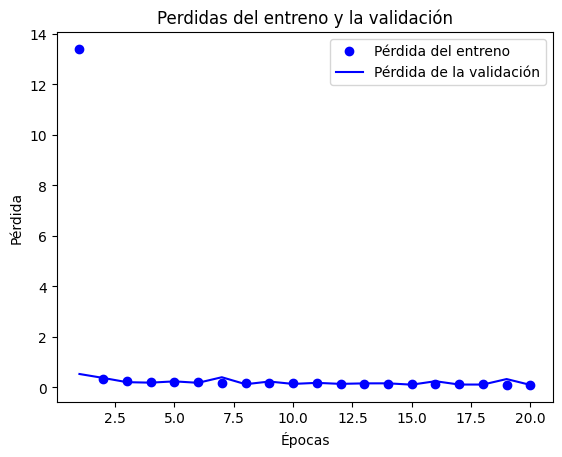

In [33]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

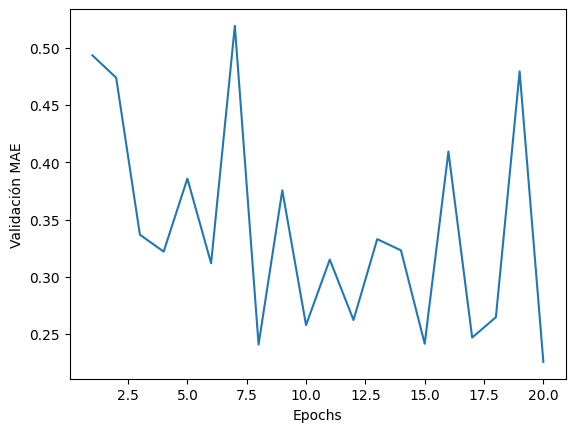

In [34]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

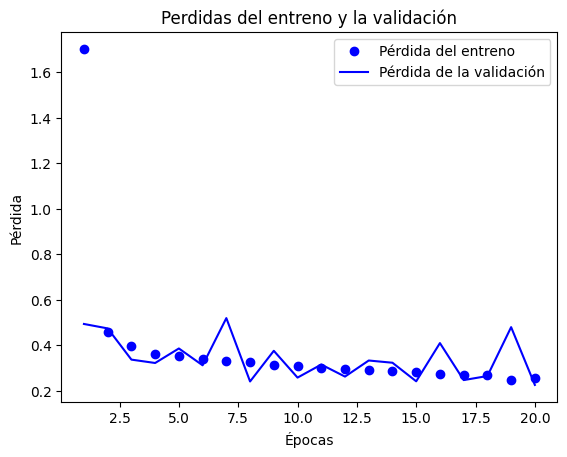

In [35]:
import matplotlib.pyplot as plt

loss = history.history['mean_absolute_error']
val_loss = history.history['val_mean_absolute_error']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

Después de haber entrenado este nuevo modelo, se verifica que con 20 épocas no se presenta sobreajuste y que los valores de la métrica de interés son muy similares al finalizar la época 20, comparados con los obtenidos al finalizar la época 100 en el modelo anterior.
- Val_mean_absolute_error en la época 100 del modelo 1: 0.08
- Val_mean_absolute_error en la época 20 del modelo 2: 0.19

Como se puede observar, la diferencia es prácticamente insignificante.

Tras determinar el número óptimo de épocas y definir el modelo de red adecuado para abordar este problema, se ha optado por implementar el método k-fold cross-validation para mejorar las métricas del modelo obtenido.

Este método implica dividir los datos de entrenamiento en 4 partes iguales durante 4 iteraciones. En cada iteración, una de las partes se utiliza como conjunto de validación mientras que las otras tres partes se utilizan como datos de entrenamiento. Esto asegura una mayor diversidad en los datos de validación y entrenamiento a lo largo de las iteraciones.

In [36]:
import numpy as np

k = 4
num_val_samples = len(train_datos) // k
print("num_val_samples", num_val_samples)
num_epochs = 20
all_scores = []
for i in range(k):
    print('processing fold #', i)
    print("Uso para validar el siguiente rango de datos de entrenamiento -> [",(i * num_val_samples),":",((i + 1) * num_val_samples),"]")
    val_data = train_datos[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    print("Uso para entrenar el siguiente rango de datos de entrenamiento -> [0:",(i * num_val_samples),"]U[",(i + 1) * num_val_samples,":",len(train_datos),"]")
    partial_train_data = np.concatenate(
        [train_datos[:i * num_val_samples],
         train_datos[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_labels[:i * num_val_samples],
         train_labels[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=128, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

num_val_samples 17500
processing fold # 0
Uso para validar el siguiente rango de datos de entrenamiento -> [ 0 : 17500 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 0 ]U[ 17500 : 70000 ]
processing fold # 1
Uso para validar el siguiente rango de datos de entrenamiento -> [ 17500 : 35000 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 17500 ]U[ 35000 : 70000 ]
processing fold # 2
Uso para validar el siguiente rango de datos de entrenamiento -> [ 35000 : 52500 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 35000 ]U[ 52500 : 70000 ]
processing fold # 3
Uso para validar el siguiente rango de datos de entrenamiento -> [ 52500 : 70000 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 52500 ]U[ 70000 : 70000 ]


Se muestran los diversos valores de error medio absoluto de validación obtenidos en cada una de las iteraciones

In [37]:
all_scores

[0.25394997000694275,
 0.1882592886686325,
 0.32748889923095703,
 0.18568260967731476]

Se realiza la media de los datos obtenidos en el apartado anterior con el fin de conocer el verdadero error medio absoluto del nuevo modelo en el cual se emplean los k-folds.

In [38]:
np.mean(all_scores)

0.23884519189596176

In [39]:
from keras import backend as K
K.clear_session()

A continuación, se procede a repetir el proceso de k-fold cross-validation con un número mayor de épocas para determinar cuál es el número adecuado de épocas de entrenamiento. En este caso, se registrarán los valores de MAE (Mean Absolute Error) en cada época para poder generar una gráfica que nos permita visualizar claramente el número óptimo de épocas a emplear.

In [40]:
num_epochs = 60
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    print("Uso para validar el siguiente rango de datos de entrenamiento -> [",(i * num_val_samples),":",((i + 1) * num_val_samples),"]")
    val_data = train_datos[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    print("Uso para entrenar el siguiente rango de datos de entrenamiento -> [0:",(i * num_val_samples),"]U[",(i + 1) * num_val_samples,":",len(train_datos),"]")
    partial_train_data = np.concatenate(
        [train_datos[:i * num_val_samples],
         train_datos[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_labels[:i * num_val_samples],
         train_labels[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=128, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
Uso para validar el siguiente rango de datos de entrenamiento -> [ 0 : 17500 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 0 ]U[ 17500 : 70000 ]
processing fold # 1
Uso para validar el siguiente rango de datos de entrenamiento -> [ 17500 : 35000 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 17500 ]U[ 35000 : 70000 ]
processing fold # 2
Uso para validar el siguiente rango de datos de entrenamiento -> [ 35000 : 52500 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 35000 ]U[ 52500 : 70000 ]
processing fold # 3
Uso para validar el siguiente rango de datos de entrenamiento -> [ 52500 : 70000 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 52500 ]U[ 70000 : 70000 ]


Se hace la media en cada una de las épocas usando los datos de mae de cada una de las 4 iteraciones realizadas durante el proceso de k-folds

In [41]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

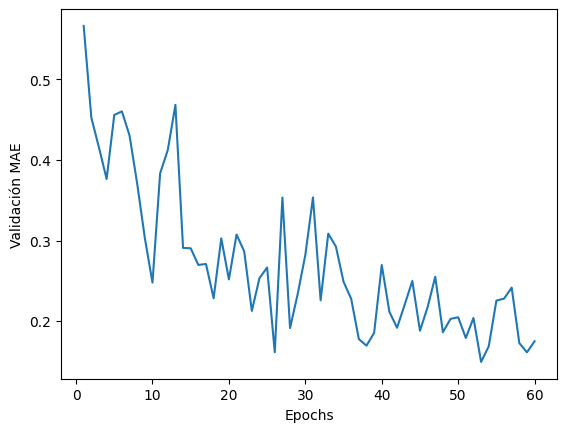

In [42]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

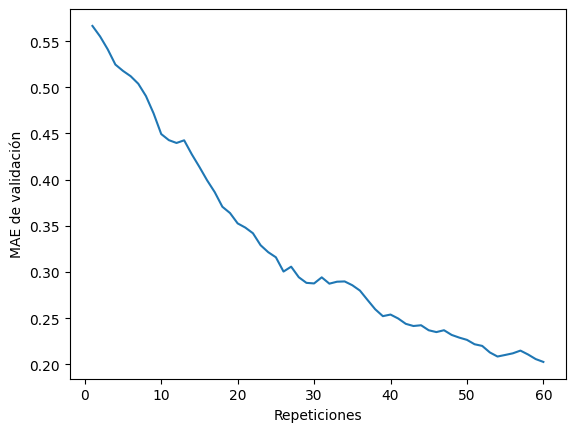

In [43]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[0:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Repeticiones')
plt.ylabel('MAE de validación')
plt.show()

Observando ambas gráficas obtenidas, se puede confirmar que, al igual que en los modelos sin utilizar k-folds, un número adecuado de épocas serían 20. A partir de este punto, la mejora en el modelo es mínima y conllevaría un incremento innecesario en el costo computacional.

Finalmente, se implementa el modelo con los hiperparámetros que se han determinado como óptimos después de realizar diversos estudios. El objetivo es evaluar el rendimiento de este modelo utilizando los datos de prueba.

In [44]:
model = build_model()
model.fit(train_datos, train_labels,
          epochs=20, batch_size=128, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_datos, test_labels )

811/811 [==============================] - 1s 2ms/step - loss: 0.0650 - mean_absolute_error: 0.2123


Dado que la métrica utilizada para evaluar este problema es el error medio absoluto, se presenta el valor de este error medio absoluto después de evaluar el modelo con los datos de prueba.

In [45]:
test_mae_score

0.21228691935539246

# CONCLUSIONES Y TRABAJO FUTURO

Tras realizar diversos estudios para desarrollar el modelo adecuado para el proyecto propuesto, se pueden extraer las siguientes conclusiones:

En el caso de un modelo de regresión con una gran cantidad de datos, como el presente, no es necesario aplicar el método de k-folds, ya que no mejora las métricas de validación obtenidas en los modelos sin utilizar este método.

Es crucial determinar el número óptimo de épocas para entrenar el modelo en los modelos de regresión. A menudo, aunque el error medio absoluto continúe disminuyendo, la reducción es mínima, lo que hace que no sea rentable entrenar el modelo durante más épocas para obtener mejoras muy pequeñas.

En cuanto a la evaluación del proyecto en sí mismo, se han alcanzado resultados muy satisfactorios. El modelo final, evaluado con los datos de prueba, muestra un error medio absoluto de 0.259. Esto indica que las predicciones de temperatura del modelo son precisas, considerando que el rango de temperaturas en los datos va desde -21.8°C hasta 39.9°C, lo cual abarca un rango de 62 grados centígrados. Por lo tanto, el error medio absoluto representa solo un 0.05% de este amplio rango.

En cuanto a futuras líneas de trabajo para el proyecto, se podría considerar la creación de una base de datos con registros de múltiples ubicaciones. Esto implicaría incorporar una nueva característica en los datos de entrada que categorice cada registro según su ubicación, lo que permitiría conocer simultáneamente la temperatura en varios lugares.

Otra posibilidad sería introducir una característica de fecha para poder predecir tanto la temperatura mínima como máxima en un lugar en un día específico, no solo la temperatura en un momento dado.